In [1]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
data = []
with open('faithful.dat','r') as f:
    reader = csv.reader(f,delimiter = " ")
    for line in reader:
        data.append(line)
data = np.asarray(data[26:])

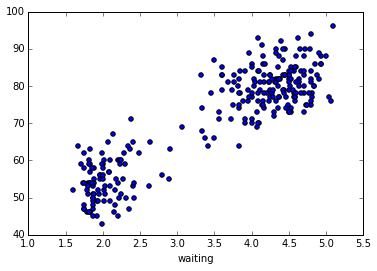

In [3]:
#parse data
data = [[x for x in line if x!= ''] for line in data]
data = np.asarray(data,dtype=np.float)
train = data[:,1:]
plt.scatter(train[:,0],train[:,1])
plt.xlabel('eruptions')
plt.xlabel('waiting')

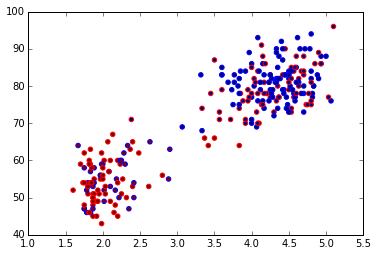

In [4]:
#initialze gmm by kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(2)
pred = kmeans.fit_predict(train)
plt.scatter(train[:,0],train[:,1],c = pred,color=['red','blue'])
m1,m2 = kmeans.cluster_centers_
c1 = train[[i for i in range(len(pred)) if pred[i] == 0]]
c2 = train[[i for i in range(len(pred)) if pred[i] == 1]]
cov1 = np.cov(c1.T)
cov2 = np.cov(c2.T)
pi = len(c1)/float(len(train))

In [256]:
from scipy.stats import multivariate_normal
from scipy.spatial import distance
def resp(pi,i,N1,N2):
#    print pi
    return (pi*N1[i])/float((pi*N1[i])+((1-pi)*N2[i]))
def loglikelihood(pi,N1,N2,train):
    return np.sum(np.log([pi*j + (1-pi)*k for j,k in zip(N1,N2)]),axis = 0)
def GMM(train,m1,m2,cov1,cov2,pi,threshold):
    #compute the bivariate normal density over each data points and each components
    count = 0
    mean1 = []
    mean2 = []
    diff=1000
    loglihood = -100
    while(diff > threshold):
#        print "iterate"
        #compute the bivariate normal density over each data points and each components
        N1 = multivariate_normal.pdf(train,m1,cov1)
        N2 = multivariate_normal.pdf(train,m2,cov2)
#        print len(N1),len(N2)
        r1 = [resp(pi,i,N1,N2) for i in range(len(train))]
        r2 = [resp(1-pi,i,N2,N1) for i in range(len(train))]
#        print r2
        #recalculate mean and covariance matrix
        pi = np.sum(r1,axis=0)/float(len(train))
        x = [r1[i]*train[i] for i in range(len(train))]
        new_m1 = np.sum(np.asarray(x),axis=0)/float(pi*len(train))
        x = [r2[i]*train[i] for i in range(len(train))]
        new_m2 = np.sum(np.asarray(x),axis=0)/float((1-pi)*len(train))
        new_loglihood = loglikelihood(pi,N1,N2,train)
        diff = np.abs(new_loglihood-loglihood)
        loglihood = new_loglihood
        print loglihood
        m1,m2 = new_m1,new_m2
        mean1.append(m1)
        mean2.append(m2)
        x = [r1[i]*(np.asarray(subtract(train[i],m1)).T).dot(np.asarray(subtract(train[i],m1))) 
                for i in range(len(train))]
        x_ = np.sum(np.asarray(x),axis=0)/float(pi*len(train))
        cov1 = np.matrix([[x_,0],[0,x_]])
        x = [r2[i]*(np.asarray(subtract(train[i],m2)).T).dot(np.asarray(subtract(train[i],m2))) 
                for i in range(len(train))]
        x_ = np.sum(np.asarray(x),axis=0)/float((1-pi)*len(train))
        cov2 = np.matrix([[x_,0],[0,x_]])
#        print m1,m2
        count=count+1
    return mean1,mean2,count

In [257]:
mean1,mean2,iteration = GMM(train,m1,m2,cov1,cov2,pi,0.1)

-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843


[array([  4.29809384,  80.07021993]), array([  4.27394125,  80.09176033]), array([  4.27431114,  80.09417251]), array([  4.27436349,  80.09449106]), array([  4.27436974,  80.0945234 ])]


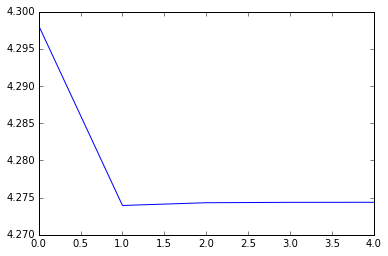

In [258]:
print mean1
plt.plot(range(iteration),[1/2*(mean1[i][0]+mean1[i][1])*(mean1[i][0]+mean1[i][1] +1)+mean1[i][0] for i in range(iteration)])

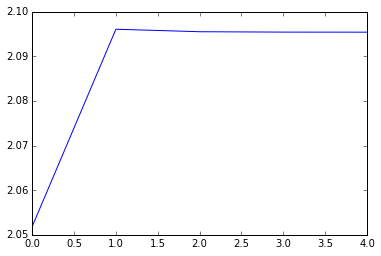

In [259]:
plt.plot(range(iteration),[1/2*(mean2[i][0]+mean2[i][1])*(mean2[i][0]+mean2[i][1] +1)+mean2[i][0] for i in range(iteration)])

In [260]:
# 50 times iterations
iterations = []
for k in range(50):
    #use kmeans to initialize
    kmeans = KMeans(2)
    pred = kmeans.fit_predict(train)
    m1,m2 = kmeans.cluster_centers_
    c1 = train[[i for i in range(len(pred)) if pred[i] == 0]]
    c2 = train[[i for i in range(len(pred)) if pred[i] == 1]]
    cov1 = np.cov(c1.T)
    cov2 = np.cov(c2.T)
    pi = len(c1)/float(len(train))
    #apply initial parameter to gmm-fitting
    mean1,mean2,iteration = GMM(train,m1,m2,cov1,cov2,pi,0.0001)
    iterations.append(iteration)
#    print k

-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-1766.77090546
-1766.73236843
-1766.72699615
-1766.7262835
-1766.72620935
-1143.55925401
-1768.94365827
-1767.04331767
-17

(array([  0.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0.,   0.]),
 array([ 7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5]),
 <a list of 10 Patch objects>)

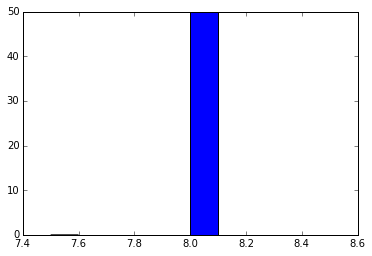

In [262]:
m = np.mean(iterations)
plt.hist(iterations)

In [241]:
def GMM_random(train,threshold):
    #compute the bivariate normal density over each data points and each components
    count = 0
    mean1 = []
    mean2 = []
    diff = 10000
    m1 = [np.random.randint(1,3),np.random.randint(40,70)]
    m2 = [np.random.randint(3,5),np.random.randint(60,100)]
    cov1 = np.matrix([[pow(np.random.randint(1,100),2),0],[0,pow(np.random.randint(1,100),2)]])
    cov2 = np.matrix([[pow(np.random.randint(1,100),2),0],[0,pow(np.random.randint(1,100),2)]])
#    print cov1
#    print cov2
    pi = 0.5
    loglihood = -100
    while(diff > threshold):
#        print "iterate"
        #compute the bivariate normal density over each data points and each components
        N1 = multivariate_normal.pdf(train,m1,cov1)
        N2 = multivariate_normal.pdf(train,m2,cov2)
#        print len(N1),len(N2)
        r1 = [resp(pi,i,N1,N2) for i in range(len(train))]
        r2 = [resp(1-pi,i,N2,N1) for i in range(len(train))]
#        print r2
        #recalculate mean and covariance matrix
        pi = np.sum(r1,axis=0)/float(len(train))
        x = [r1[i]*train[i] for i in range(len(train))]
        new_m1 = np.sum(np.asarray(x),axis=0)/float(pi*len(train))
        x = [r2[i]*train[i] for i in range(len(train))]
        new_m2 = np.sum(np.asarray(x),axis=0)/float((1-pi)*len(train))
        new_loglihood = loglikelihood(pi,N1,N2,train)
        diff = np.abs(new_loglihood-loglihood)
        loglihood = new_loglihood
        print diff
        m1,m2 = new_m1,new_m2
        mean1.append(m1)
        mean2.append(m2)
        x = [r1[i]*(np.asarray(subtract(train[i],m1)).T).dot(np.asarray(subtract(train[i],m1))) 
                for i in range(len(train))]
        x_ = np.sum(np.asarray(x),axis=0)/float(pi*len(train))
        cov1 = np.matrix([[x_,0],[0,x_]])
        x = [r2[i]*(np.asarray(subtract(train[i],m2)).T).dot(np.asarray(subtract(train[i],m2))) 
                for i in range(len(train))]
        x_ = np.sum(np.asarray(x),axis=0)/float((1-pi)*len(train))
        cov2 = np.matrix([[x_,0],[0,x_]])

#        print m1,m2
        count=count+1
    return mean1,mean2,count

In [242]:
mean1,mean2,iteration = GMM_random(train,0.01)

2324.07894759
461.011789958
51.1290845722
72.0463007334
53.4323034386
15.5352662672
3.00828601453
0.722708161072
0.246842404885
0.107288606223
0.0526777747411
0.0274362461257
0.0147302656712
0.00804041151196


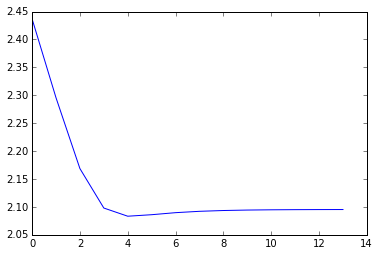

In [243]:
plt.plot(range(iteration),[1/2*(mean1[i][0]+mean1[i][1])*(mean1[i][0]+mean1[i][1] +1)+mean1[i][0] for i in range(iteration)])

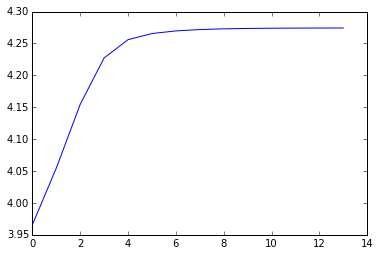

In [244]:
plt.plot(range(iteration),[1/2*(mean2[i][0]+mean2[i][1])*(mean2[i][0]+mean2[i][1] +1)+mean2[i][0] for i in range(iteration)])

In [245]:
# 50 times iterations
iterations = []
for k in range(50):
    mean1,mean2,iteration = GMM_random(train,0.0001)
    iterations.append(iteration)

2659.79464964
843.938269927
55.8393819554
44.7386181967
29.2012091561
13.4581610655
4.64818029573
1.2515264747
0.214329480362
0.0332427069602
0.0640861627091
0.0491433470934
0.0313765310311
0.0186873696216
0.010781119656
0.0061216083925
0.00344701392805
0.00193227857926
0.00108051397092
0.000603397369332
0.000336706064218
0.000187809542695
0.000104733056105
5.83974504025e-05
1964.92939893
8.6146257398
0.0230989548777
0.0224686732176
0.0226170895612
0.0228488176313
0.0229294195042
0.0227923354814
0.0224321516771
0.0218690698821
0.0211362617965
0.0202742074462
0.0193272074348
0.0183407577615
0.0173595139845
0.016425834036
0.015578917556
0.0148545296074
0.014285265529
0.0139012993582
0.0137315643051
0.0138053392848
0.0141542593501
0.01481483104
0.0158316218544
0.0172614194048
0.0191788451771
0.0216842060827
0.0249148573125
0.0290621877161
0.0343978220922
0.0413153579934
0.0503991538344
0.0625420528418
0.0791556502131
0.10256489303
0.136793008744
0.189235508052
0.274545970284
0.4246527337


In [246]:
m_random = np.mean(iterations)
cov_random = np.cov(iterations)

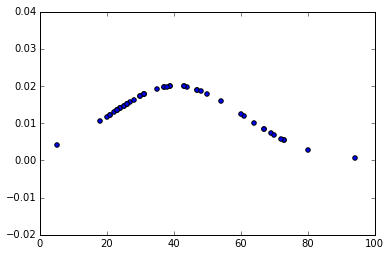

In [247]:
y = multivariate_normal.pdf(iterations,m_random,cov_random)
plt.scatter(iterations,y)
#plt.plot(range(50),iterations)

(array([  1.,   5.,  18.,   6.,   6.,   2.,   5.,   5.,   1.,   1.]),
 array([  5. ,  13.9,  22.8,  31.7,  40.6,  49.5,  58.4,  67.3,  76.2,
         85.1,  94. ]),
 <a list of 10 Patch objects>)

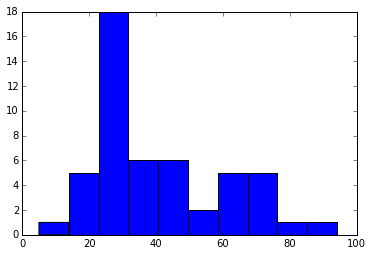

In [248]:
plt.hist(iterations)

In [216]:
print iterations

[31, 37, 68, 32, 48, 30, 55, 34, 52, 80, 53, 28, 25, 48, 24, 39, 22, 51, 57, 63, 61, 41, 49, 31, 71, 35, 80, 76, 26, 24, 48, 44, 83, 64, 61, 44, 33, 48, 24, 61, 61, 32, 36, 23, 27, 30, 26, 36, 57, 33]
